# Evaluation Project Phase 3 (Zomato Restaurant Case Study)

### By :- JIGYASA SONI

### BATCH DS2309

## Project Description


Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.


### Data Storage:
    
This problem statement contains two datasets- Zomato.csv and country_code.csv.
Country_code.csv contains two variables:
• Country code
• Country name


### Problem statement : In this dataset predict 2 things –
    
1) Average Cost for two

2) Price range



#### Hint : Use pandas merge operation -- pd.merge (df1,df2) to combine two datasets

#### Dataset Link-  

•	https://github.com/dsrscientist/dataset4/blob/main/Country-Code.xlsx
•	https://github.com/dsrscientist/dataset4/blob/main/zomato.csv



# Understanding the data by Importing important libraries

In [6]:
%autosave 0
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Autosave disabled


In [2]:
import ast

from sklearn.preprocessing import OneHotEncoder

from joblib import dump,load

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import  make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import random
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor

C:\Anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Loading the dataset: Load the data and import the libraries.

In [9]:
zomato_df = pd.read_csv("zomato.csv", encoding="ISO-8859-1")
zomato_df.head()
zomato_df.shape

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


(9551, 21)

In [1]:
zomato_df.info()

NameError: name 'zomato_df' is not defined

In [10]:
zomato_df.drop_duplicates(inplace=True)

In [14]:
zomato_df.dropna(how='any',inplace=True)
zomato_df.dropna(how='any',inplace=True)
len(zomato_df[zomato_df['Rating text'].isnull()])
len(zomato_df[zomato_df['Rating text'].isna()])

0

0

In [15]:
zomato_df.dropna(how='any',inplace=True)
zomato_df.dropna(how='any',inplace=True)

##### Note, that only the address column is omitted from the dataframe and not the location column,because location details in location column can be very useful in extracting the information about the restaurants. Also,location and listed_in(city) are the same columns.So, we drop the listed_in(city) column.

In [19]:
zomato_df.drop(columns='City',inplace=True)

In [18]:
print(zomato_df.columns)


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [20]:
len(zomato_df)

9542

##### As you can see the rate column is string type with an extra /5 with all the ratings. This should be cleaned. We found this column has 'NEW' ,"-" values which should replaced by np.nan. It is important to convert the string back to float .

In [23]:
zomato_df['Aggregate rating'] = zomato_df['Aggregate rating'].astype(str)
zomato_df['Aggregate rating'] = zomato_df['Aggregate rating'].apply(lambda x: x.split('/')[0])
zomato_df['Aggregate rating'] = zomato_df['Aggregate rating'].apply(lambda x: x.replace('NEW', str(np.nan)))
zomato_df['Aggregate rating'] = zomato_df['Aggregate rating'].apply(lambda x: x.replace('-', str(np.nan)))
zomato_df['Aggregate rating'] = zomato_df['Aggregate rating'].astype(float)

#### The Restaurant_Name has some giberish symbols such as (©,Â) . This should be cleaned .

In [25]:
zomato_df['Restaurant Name'] = zomato_df['Restaurant Name'].astype(str)
zomato_df['Restaurant Name'] = zomato_df['Restaurant Name'].apply(lambda x: x.split('©')[0])
zomato_df['Restaurant Name'] = zomato_df['Restaurant Name'].apply(lambda x: x.split('Â')[0])

#### Cleaning the Average Cost for two and Cuisine coloumn replacing ( , ) .

In [31]:
remove_comma = lambda x: int(x.replace(',', '')) if isinstance(x, str) and x != 'nan' else x
zomato_df.Votes = zomato_df.Votes.astype('int')
zomato_df['Average Cost for two'] = zomato_df['Average Cost for two'].apply(remove_comma)
zomato_df['Cuisines'] = zomato_df['Cuisines'].str.replace(',' , '') 
zomato_df['Cuisines'] = zomato_df['Cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))

#### Cleaning the Reviews coloumn by using the substring function .

In [34]:
zomato_df['Rating text'] = zomato_df['Rating text'].str.slice(start=25)


#### Has Online delivery & Has Table booking presented as strings instead of bools (working with True/False make it easier to analyze)

In [38]:
zomato_df['Has Online delivery'].replace(to_replace='Yes', value=1.0, inplace=True)
zomato_df['Has Online delivery'].replace(to_replace='No', value=0.0, inplace=True)
zomato_df['Has Table booking'].replace(to_replace='Yes', value=1.0, inplace=True)
zomato_df['Has Table booking'].replace(to_replace='No', value=0.0, inplace=True)
zomato_df.head(2)
zomato_df.shape

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,Desserts French Japanese,...,Botswana Pula(P),1.0,0.0,No,No,3,4.8,Dark Green,,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),1.0,0.0,No,No,3,4.5,Dark Green,,591


(9551, 21)

## Fact 1: The higher the number of services/cuisines provided by a restaurant, more likely it is to receive higher ratings.

### Almost 90 percent of restaurants in Country do  provide table booking facility. We will inspect this further.

In [49]:
zomato_df_cpy1 =  zomato_df.copy()

In [40]:
zomato_df_cpy1.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,Desserts French Japanese,...,Botswana Pula(P),1.0,0.0,No,No,3,4.8,Dark Green,,314


<Axes: >

Text(0.5, 1.0, 'Number of Restaurants with Service 0:No, 1:Yes')

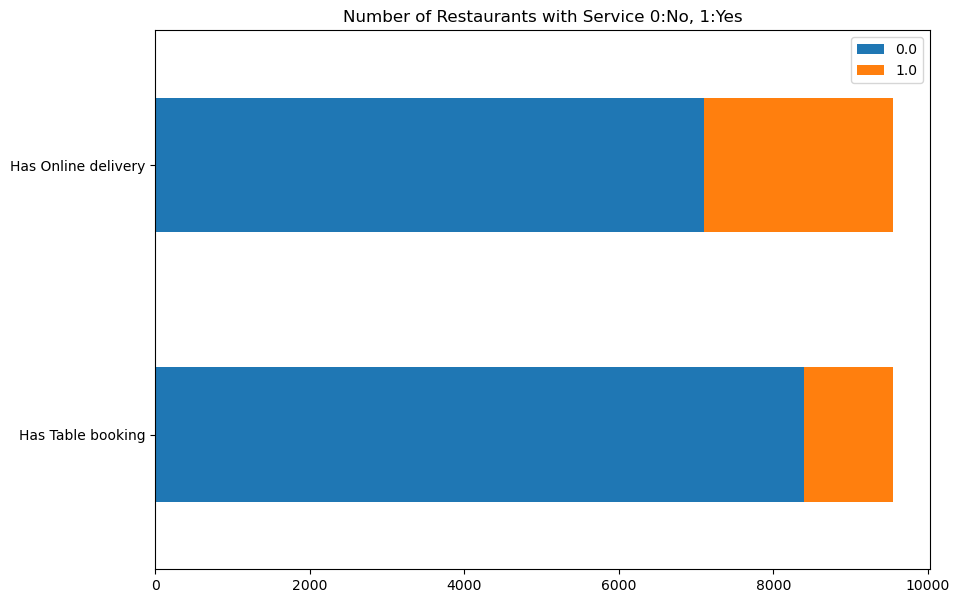

In [47]:
fig = plt.figure(figsize =(10, 7))
ax = plt.subplot(1, 1, 1)

tmp = {}
for col in ['Has Table booking', 'Has Online delivery']:
    tmp[col] = zomato_df[col].value_counts()

tmp_df = pd.DataFrame.from_dict(tmp, orient='index')
tmp_df.plot.barh(stacked=True, ax=ax)

ax.set_title('Number of Restaurants with Service 0:No, 1:Yes')
plt.show()


In [1]:
def func(r):
    i, j = r.Book_table, r.Online_Order
    if i == 0 and j == 0: return 'Both N'
    elif i == 0 and j == 1: return 'Deli'
    elif i == 1 and j == 0: return 'Book'
    else: return 'Both Y'
zomato_df_cpy['service_pos'] = zomato_df_cpy1[['Has Table booking', 'Has Online Delivery']].apply(func, axis = 1)

with plt.style.context('bmh', after_reset = True):
    sns.set(rc={'figure.figsize':(14.7,14.27)})

    g = sns.FacetGrid(data = zomato_df_cpy, hue = 'service_pos', hue_order = ['Both N', 'Deli', 'Book', 'Both Y'], palette = "inferno", size = 3, aspect = 3)
    g.map(sns.distplot, 'Rating text')
    plt.legend(loc=1)
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle('Rating Distribution V/S Number of Services Offered (Has Table booking / Has Online Delivery )')
    plt.show()
    
zomato_df_cpy1['rating_cat'] = zomato_df_cpy1['Rating text'].round(0).astype(int)    
zomato_df_cpy1['Cuisines'] = zomato_df_cpy1['Cuisines']
zomato_df_cpy1['fusion_num'] = zomato_df_cpy1['Cuisines'].apply(lambda x: len(x.split(' ')))

from collections import Counter
lst_cuisines = set()
Cnt_cuisines = Counter()
for cu_lst in zomato_df_cpy1['Cuisines']:
    cu_lst = cu_lst.split(' ')
    lst_cuisines.update([cu.strip() for cu in cu_lst])
    for cu in cu_lst:
        Cnt_cuisines[cu.strip()] += 1

cnt = pd.DataFrame.from_dict(Cnt_cuisines, orient = 'index')
cnt.sort_values(0, ascending = False, inplace = True)

tmp_cnt = cnt.head(10)
tmp_cnt.rename(columns = {0:'cnt'}, inplace = True)

NameError: name 'zomato_df_cpy1' is not defined